In [1]:
###############################################################################
# main full - user interface

# 1.- We ask the user to input a message, a spell is expected
# 2.- The message is then interpreted as the treadle sequence which determines
#     how the tie-up will be read.
# 3.- A weaving design is made, using the parameters in N1 and N2.
# 4.- A network is created from the weaving design.
# 5.- An animated form of the design is presented.
# N1.- The tie-up has been pre-designed. It is based on a simple Shannon-Fano
#     coding of the alphabet plus arbitrary padding to match length.
# N2.- The shaft sequence is also arbitrary. We have chosen a simple sequence
#    often seen in weaving examples: start with lowest number and go up to largest
#    and down again periodically, for the same length of the treadle sequence
#    (which is the length of the message).
# A weaving draft looks like this:
# [][][][][] |    O O 
# [][][][][] |  O   O
# [][][][][] |  O
#            | [][][]
#            | [][][]
#            | [][][]
#            | [][][]
#            | [][][]

# the upper set of rows [] is the threading sequence. the corner circles are the
# tie-up, and the set of columns [] is the treadle sequence

# Efrén Cruz Cortés
###############################################################################

In [2]:
# We start by designing the tie-up patterns
def create_coding_chords():
    a_chords_raw = [[0,0,1,1,1,1,0,0],
                 [0,1,1,1,0,1,1,0],
                 [0,1,1,1,0,1,0,0],
                 [0,1,0,1,1,0,0,0],
                 [0,1,1,1,0,0,1,1],
                 [0,1,0,1,0,1,0,1],
                 [0,1,0,1,1,0,0,1],
                 [0,1,0,1,0,1,1,1],
                 [0,1,0,0,1,0,0,1],
                 [1,0,0,0,1,1,1,1],
                 [1,0,0,0,1,1,1,0],
                 [1,0,0,0,1,0,0,1],
                 [1,0,0,0,0,1,0,1],
                 [1,0,1,1,1,1,0,1],
                 [1,0,1,1,0,0,1,0],
                 [1,0,1,0,1,1,0,0],
                 [1,0,1,0,1,0,1,0],
                 [1,0,1,0,0,1,0,1],
                 [1,0,0,1,1,1,0,0],
                 [1,0,0,1,0,1,0,0],
                 [1,0,0,0,1,0,1,0],
                 [1,0,0,0,0,1,1,0],
                 [1,1,0,0,0,0,1,1],
                 [1,0,0,0,0,0,1,0],
                 [1,0,0,1,1,0,0,1],
                 [1,0,0,1,0,0,1,0]
                 ]
    return a_chords_raw;

In [3]:
a_chords_raw = create_coding_chords()

In [4]:
### ::: GENERATE TREADLE SEQUENCE ::: ####
# we will use numpy in the future, import it
import numpy as np

In [22]:
# Type your spell, for example: 'my jam is the necronomicon'.
# We recommend a short spell.
# Punctuation and line breaks don't matter.
my_message = input('Short Spell: ')

Short Spell: my jam is-the necronomicon, dance dance dance guillotin and prance, friendly automaton


In [23]:
# make it into a character list
my_message = my_message.lower()
mlist = list(my_message)
ml = len(mlist)

In [24]:
# obtain alphabet letters
alphabet = ['abcdefghijklmnopqrstuvwxyz']
alphabet = list(alphabet[0])
alphabet = np.asarray(alphabet)

In [25]:
# the treadle sequence will indicate which chord in the tie-up to play
treadle_sequence = np.zeros((ml))
for ii in range(0,ml):
    ci = np.where(alphabet == mlist[ii])
    if ci[0].size == 1:
        treadle_sequence[ii] = int(ci[0])
        # else just ignore the character
    treadle_sequence = np.array(treadle_sequence,dtype = int)

In [26]:
### ::: Generate THREADING SEQUENCE ::: ###
import math
N_shafts = len(a_chords_raw[0])
L_shafts = len(treadle_sequence)
shaft_sequence = np.zeros((L_shafts + math.floor(L_shafts/N_shafts)))
cbit = -1
for i in range(0,len(shaft_sequence)):
    if np.mod(i,N_shafts) == 0:
        cbit = cbit*(-1)
    if (cbit > 0):
        shaft_sequence[i] = np.mod(i,N_shafts)
    else:
         shaft_sequence[i] = N_shafts - 1 - np.mod(i,N_shafts)
rep = N_shafts*(1 + np.arange(math.floor(L_shafts/N_shafts)))
shaft_sequence = np.asarray(shaft_sequence)
shaft_sequence = np.delete(shaft_sequence,rep)

In [27]:
### ::: MAKE DESIGN ::: ###
def populate_matrix_binary(chords,ts,ss):
    N_ts = len(ts)
    N_ss = len(ss)
    D = np.zeros((N_ts,N_ss))
    for tt in range(0,len(ts)):
        c = chords[ts[tt]]
        c = np.asarray(c)
        c = np.where(c == 1)
        for ii in c[0]:
            rs = np.where(ss == ii)
            D[tt,rs] = 1    
    return D;
design = populate_matrix_binary(a_chords_raw,treadle_sequence,shaft_sequence)

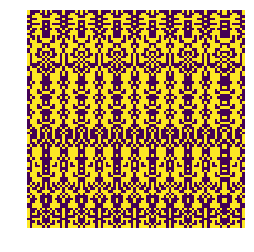

In [28]:
### ::: CREATE SOME PLOTS ::: ###
import matplotlib.pyplot as plt
plt.figure(1)
plt.imshow(design)
plt.axis('off')
plt.show();

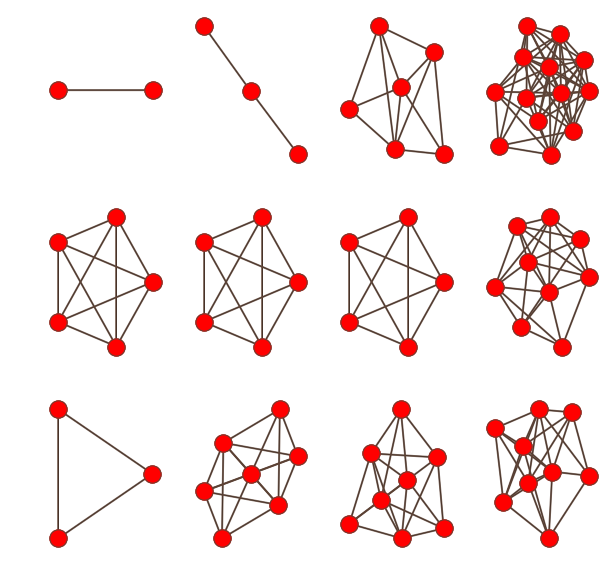

In [29]:
# Now, let's obtain the network from the weave.
# In order for it not to be messy, we have to split the spell into words.
# To spare you the time, we have a function that does this in another file. We'll just call it.

# First let's get an appropriate image size, in inches
my_image_size = 10

# now we just call the other function
from split_graphs import make_multiple_graphs
make_multiple_graphs(my_message,a_chords_raw,my_image_size)